<a href="https://colab.research.google.com/github/Just1919/Customer-Segmentation-in-Real-Marketing-with-K-Means/blob/main/Customer_Segmentation_in_Real_Marketing_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Segmentation in Real Marketing: How K-Means Can Boost Your Campaigns




Ever wondered why some customers spend a fortune while others barely open your emails?
In marketing, understanding your customers is gold — and data science can help.

In this article, I’ll show how to segment customers using K-Means, not on the classic Iris dataset, but on a real-life business scenario: marketing and customer targeting.

By the end, you’ll see how clustering can turn raw data into actionable business insights.

##The Business Problem

A retail company wants to:

* Increase sales without annoying customers
* Reward loyal buyers

* Understand which customers respond best to campaigns

Goal: Segment customers in a way that marketing teams can target effectively.

#Preparing the Data

In [7]:
#Import librairies
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt



In [2]:
#Dataset
customers = pd.read_csv("/content/drive/MyDrive/Costumers.csv")

In [28]:
#Display the 5 fives rows
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We start with typical customer data:

* Gender (Male/Female)

* Age

* Annual Income

* Spending Score (1–100)

Machine learning can only handle numbers, so we encode the gender:

*   List item
*   List item



In [5]:
df=customers.copy()
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


We extract the gender, age, annual income, and spending score columns. Then we use the
elbow method to determine the optimum number of clusters based on these features:

1 308862.06000000006
   
2 212889.44245524294
   
3 143391.59236035674
   
4 105299.98742210327
   
5 82657.05476706794
   
6 58387.211042939205
   
7 52544.81463287703
   
8 44389.80767355767
   
9 40670.989962363215
   
10 37201.52704476876
   
11 35360.07987012987
   
12 33108.3862914863
   
13 31667.76129148629
   
14 30472.522961760475
   


Text(0, 0.5, 'Inertia')

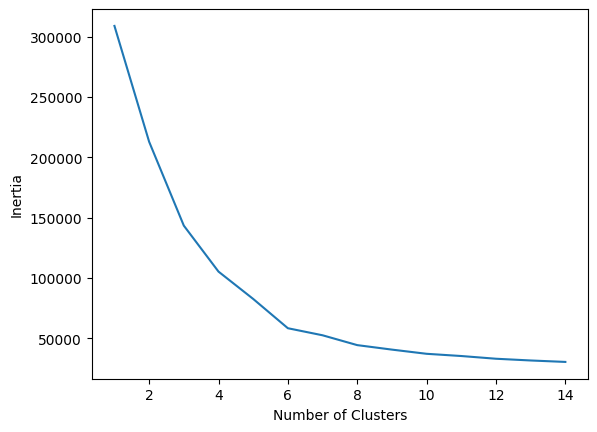

In [14]:
points = df.iloc[:, 1:5].values
inertias = []
for i in range(1, 15):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)
  print(i, kmeans.inertia_)
  print("   ")

plt.plot(range(1, 15), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

As we can see 6 appears to be the reasonable number

Segment the customers into six clusters and we add a column named Cluster contain
ing the index of the cluster (0-5) to which the customer was assigned:

In [15]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(points)
df['Cluster']=kmeans.predict(points)

Here is the ouput


In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,5
2,3,0,20,16,6,2
3,4,0,23,16,77,5
4,5,0,31,17,40,2


We have assigned a cluster number to each customer, but what does it tell us? We can’t visualize gender, age, annual income, and spending score together in a two-dimensional chart the way we can for just annual income and spending score. However, we can calculate the mean (average) of these attributes for each cluster using the cluster centroids. Let’s create a new DataFrame with columns for average age, average income, and so on, and then present the results in a table:

In [19]:
# First, we ensure the number of clusters matches the model
n_clusters = kmeans.n_clusters  # Get the number of clusters actually used

# Create an empty DataFrame to store cluster summaries
results = pd.DataFrame(columns=[
    'Cluster', 'Average Age', 'Average Income', 'Average Spending Index',
    'Number of Females', 'Number of Males'
])

# Iterate over each cluster
for i in range(n_clusters):
    # Get all customers belonging to this cluster
    gdf = df[df['Cluster'] == i]

    # Calculate averages directly from the cluster's data
    age = gdf['Age'].mean()
    income = gdf['Annual Income (k$)'].mean()
    spend = gdf['Spending Score (1-100)'].mean()

    # Count females and males
    females = gdf[gdf['Gender'] == 0].shape[0]  # Assuming 0 = Female
    males = gdf[gdf['Gender'] == 1].shape[0]    # Assuming 1 = Male

    # Add row to results
    results.loc[i] = [i, age, income, spend, females, males]

# Display the summary table
results.head(10)

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,56.340909,53.704545,49.386364,25.0,19.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,44.318182,25.772727,20.272727,13.0,9.0
3,3.0,41.647059,88.735294,16.764706,15.0,19.0
4,4.0,27.315789,57.500000,48.447368,24.0,14.0
5,5.0,25.521739,26.304348,78.565217,14.0,9.0


To make it clear for marketing teams, we can assign business-oriented labels to each cluster:

In [20]:
def segment_label(row):
    if row['Average Income'] > 80 and row['Average Spending Index'] > 70:
        return 'Premium High-Spender'
    elif row['Average Income'] > 80:
        return 'High Income, Low-Spender'
    elif row['Average Spending Index'] > 70:
        return 'Young High-Spender'
    elif row['Average Age'] < 30:
        return 'Young Moderate-Spender'
    else:
        return 'Regular Customer'

results['Segment_Label'] = results.apply(segment_label, axis=1)

In [29]:
results.head(10)

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males,Segment_Label
0,0.0,56.340909,53.704545,49.386364,25.0,19.0,Regular Customer
1,1.0,32.692308,86.538462,82.128205,21.0,18.0,Premium High-Spender
2,2.0,44.318182,25.772727,20.272727,13.0,9.0,Regular Customer
3,3.0,41.647059,88.735294,16.764706,15.0,19.0,"High Income, Low-Spender"
4,4.0,27.315789,57.500000,48.447368,24.0,14.0,Young Moderate-Spender
5,5.0,25.521739,26.304348,78.565217,14.0,9.0,Young High-Spender


Now each cluster has a clear label that marketing teams can immediately understand.

A simple plot can help communicate the insights visually.

In [24]:
# Map the labels from results to df
# Then map it to each row in df using the cluster index
df['Segment_Label'] = df['Cluster'].map(results['Segment_Label'])

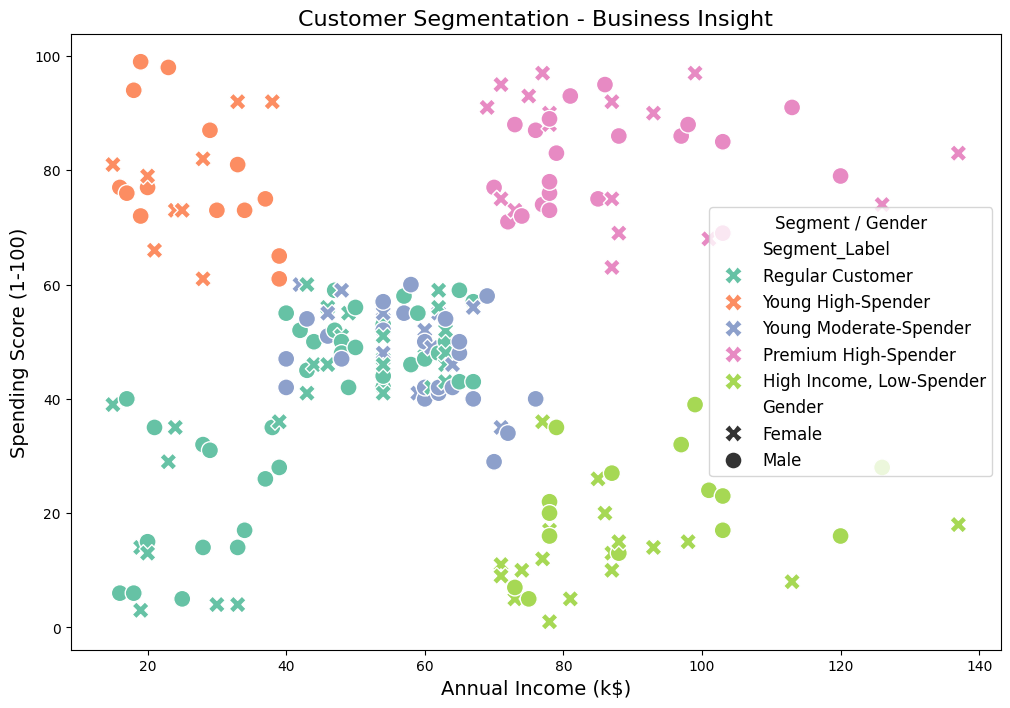

In [31]:
df['Gender'] = df['Gender'].map({0:'Male', 1:'Female'})
markers={'Male':'o', 'Female':'X'}

# Agrandir le graphique
plt.figure(figsize=(12, 8))  # largeur=12, hauteur=8

# Scatterplot
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Segment_Label',   # Couleur par segment
    style='Gender',        # Forme par genre
    markers={'Male':'o', 'Female':'X'},  # Choix des symboles
    palette='Set2',
    s=150  # Taille des points
)

# Titres et axes
plt.title("Customer Segmentation - Business Insight", fontsize=16)
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.ylabel("Spending Score (1-100)", fontsize=14)

# Légende
plt.legend(title="Segment / Gender", fontsize=12, title_fontsize=12)

# Affichage
plt.show()

💡 Interpretation:
High-income but low-spending clusters are perfect targets for upsell campaigns, while young high-spenders are ideal for loyalty programs.

| Segment                  | Recommended Action                 | Objective                         |
| ------------------------ | ---------------------------------- | --------------------------------- |
| Premium High-Spender     | Exclusive offers & loyalty rewards | Increase lifetime value (LTV)     |
| High Income, Low-Spender | Upsell & cross-selling             | Convert low spending into revenue |
| Young High-Spender       | Rewards & gamification             | Retain young customers            |
| Young Moderate-Spender   | Targeted campaigns                 | Boost engagement                  |
| Regular Customer         | Email & standard promotions        | Maintain activity                 |


Imagine a retail company launching its summer campaign. Using these segments, they could target ‘High Income, Low-Spender’ with premium offers, reward ‘Young High-Spender’ with loyalty perks, and re-engage moderate spenders. The result? Higher conversion rates, happier customers, and smarter marketing spend.

### Key Takeaway

Customer segmentation with K-Means is not just about numbers — it’s about turning data into actionable business strategy. Every campaign, promotion, or loyalty program can now be precision-targeted, increasing ROI and customer satisfaction. Real data science, real impact.